In [1]:
import numpy as np
import pandas as pd
import torch
from torch import nn
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from statistics import pstdev, mean
import os
import json
import time
from operator import itemgetter

In [2]:
okuzeni = pd.read_csv("C:\\Users\\User\\OneDrive - Univerza v Ljubljani\\Faks\\Magisterij\\NSU\\NSU23_DN5_Part2\\okuzeni.csv")
okuzeni_mestne = okuzeni[['ljubljana', 'maribor', 'kranj', 'koper', 'celje', 'novo_mesto', 'velenje', 'nova_gorica', 'krško', 'ptuj', 'murska_sobota', 'slovenj_gradec']]
okuzeni_mestne["slovenj_gradec"].fillna(0, inplace=True)
y = okuzeni_mestne
obcine = ['ljubljana', 'maribor', 'kranj', 'koper', 'celje', 'novo_mesto', 'velenje', 'nova_gorica', 'krško', 'ptuj', 'murska_sobota', 'slovenj_gradec']
y

c:\Users\User\AppData\Local\Programs\Python\Python37\lib\site-packages\pandas\core\generic.py:6383: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


,ljubljana,maribor,kranj,koper,celje,novo_mesto,velenje,nova_gorica,krško,ptuj,murska_sobota,slovenj_gradec
0,2953,860.0,924.0,232.0,433.0,362.0,429.0,130.0,101.0,265.0,304.0,200.0
1,2913,937.0,907.0,207.0,383.0,352.0,445.0,138.0,102.0,266.0,289.0,192.0
2,2762,939.0,837.0,188.0,378.0,371.0,414.0,134.0,105.0,272.0,297.0,198.0
3,2645,960.0,790.0,193.0,369.0,370.0,435.0,142.0,111.0,297.0,309.0,192.0
4,2532,969.0,735.0,197.0,365.0,383.0,430.0,147.0,112.0,315.0,321.0,188.0
...,...,...,...,...,...,...,...,...,...,...,...,...
795,1203,379.0,342.0,269.0,137.0,196.0,159.0,127.0,172.0,79.0,73.0,54.0
796,1154,370.0,340.0,252.0,134.0,194.0,159.0,125.0,172.0,76.0,68.0,54.0
797,1130,368.0,345.0,254.0,134.0,193.0,160.0,124.0,162.0,77.0,65.0,54.0
798,1111,351.0,359.0,260.0,129.0,201.0,169.0,131.0,159.0,77.0,66.0,49.0


In [21]:
def calculate_r2_obcina(m, data, obcina):
    r2_all_true = []
    r2_all_pred = []
    data2 = data["napovedi"]
    for i, predictions, loss in data2[obcina]:
        r2_all_true.append(y[obcina][i:i+len(predictions)])
        r2_all_pred.append(predictions)
    r2_all = r2_score(r2_all_true, r2_all_pred)
    return r2_all

def calculate_r2(m, filename):
    directory_file = 'predictions/' + filename
    with open(directory_file) as json_file:
        data = json.load(json_file)
    r2_all = 0
    r2_obcine = {}
    for obcina in obcine:
        r2_obcine[obcina] = calculate_r2_obcina(m, data, obcina)
        r2_all += calculate_r2_obcina(m, data, obcina)
    r2_all = r2_all/len(obcine)
    return r2_all, r2_obcine

# gremo čez zanko za M=7 in izpišimo top 5 model/hiperparametrov

def top_models(m=7, top=5):
    directory = 'predictions'
    my_dict = {}
    for filename in os.listdir(directory):
        if ('_' + str(m) + '_' in filename):# and ('RNN' in filename):
            my_dict[filename] = calculate_r2(m, filename)
            # odpri datoteko
            # izracun R2 score za slovar funkcija vklucno z vsemi obcinami

    # N largest values in dictionary
    # Using sorted() + itemgetter() + items()
    res = dict(sorted(my_dict.items(), key=itemgetter(1), reverse=True)[:top])
    
    # printing result
    print("Top {} modeli so ".format(top) + str(res))
    return res, my_dict

#top5_za7, r2_za7 = top_models(m=7)


In [9]:
top5_za7, r2_za7 = top_models(m=7)


Top 5 modeli so {'GRU_20_0.01_16_15_7_200_po_sekvencah.json': 0.9039801262050592, 'GRU_20_0.001_16_15_7_200_po_sekvencah.json': 0.9032423970425807, 'GRU_20_0.0001_16_15_7_200_po_sekvencah.json': 0.9024354435100089, 'LSTM_20_0.001_16_5_7_200_po_sekvencah.json': 0.9007244959841053, 'GRU_10_0.001_16_15_7_200_po_sekvencah.json': 0.8999206872666442}


In [13]:
top5_za30, r2_za30 = top_models(m=30)


Top 5 modeli so {'GRU_20_0.0001_16_15_30_200_po_sekvencah.json': -1.2160026979220715, 'GRU_20_0.001_16_15_30_200_po_sekvencah.json': -1.2558224893211227, 'LSTM_20_0.001_16_15_30_200_po_sekvencah.json': -1.785077669924804, 'RNN_20_0.01_16_15_30_200_po_sekvencah.json': -1.839993274186747, 'LSTM_20_0.0001_16_15_30_200_po_sekvencah.json': -1.9836492073746976}


In [16]:
r2_za7

{'GRU_10_0.0001_16_10_7_200_po_sekvencah.json': 0.8728156204689114,
 'GRU_10_0.0001_16_15_7_200_po_sekvencah.json': 0.8997073018066826,
 'GRU_10_0.0001_16_5_7_200_po_sekvencah.json': 0.8812699986110429,
 'GRU_10_0.0001_32_10_7_200_po_sekvencah.json': 0.8652924625678996,
 'GRU_10_0.0001_32_15_7_200_po_sekvencah.json': 0.8951205529768148,
 'GRU_10_0.0001_32_5_7_200_po_sekvencah.json': 0.8699172310820678,
 'GRU_10_0.0001_64_10_7_200_po_sekvencah.json': 0.8471858217670266,
 'GRU_10_0.0001_64_15_7_200_po_sekvencah.json': 0.8683543048418296,
 'GRU_10_0.0001_64_5_7_200_po_sekvencah.json': 0.8878948599482338,
 'GRU_10_0.001_16_10_7_200_po_sekvencah.json': 0.8748025572509145,
 'GRU_10_0.001_16_15_7_200_po_sekvencah.json': 0.8999206872666442,
 'GRU_10_0.001_16_5_7_200_po_sekvencah.json': 0.8843730259928654,
 'GRU_10_0.001_32_10_7_200_po_sekvencah.json': 0.8659018469598957,
 'GRU_10_0.001_32_15_7_200_po_sekvencah.json': 0.8953431699223997,
 'GRU_10_0.001_32_5_7_200_po_sekvencah.json': 0.874410328

In [15]:
r2_za30

{'GRU_10_0.0001_16_10_30_200_po_sekvencah.json': -13.554646866532437,
 'GRU_10_0.0001_16_15_30_200_po_sekvencah.json': -2.5161168610686815,
 'GRU_10_0.0001_16_20_30_200_po_sekvencah.json': -3.7639286611657674,
 'GRU_10_0.0001_32_10_30_200_po_sekvencah.json': -41.66984016167867,
 'GRU_10_0.0001_32_15_30_200_po_sekvencah.json': -5.465931974835555,
 'GRU_10_0.0001_32_20_30_200_po_sekvencah.json': -15.486921231045748,
 'GRU_10_0.0001_64_10_30_200_po_sekvencah.json': -58.20443177013519,
 'GRU_10_0.0001_64_15_30_200_po_sekvencah.json': -14.263328576530235,
 'GRU_10_0.0001_64_20_30_200_po_sekvencah.json': -81.06539267602405,
 'GRU_10_0.001_16_10_30_200_po_sekvencah.json': -16.86808685749042,
 'GRU_10_0.001_16_15_30_200_po_sekvencah.json': -3.0606366855407328,
 'GRU_10_0.001_16_20_30_200_po_sekvencah.json': -8.772362448936425,
 'GRU_10_0.001_32_10_30_200_po_sekvencah.json': -54.36580178994461,
 'GRU_10_0.001_32_15_30_200_po_sekvencah.json': -2.9053002393258374,
 'GRU_10_0.001_32_20_30_200_po_s

In [30]:
all1, obcine = calculate_r2(7, 'GRU_20_0.01_16_15_7_200_po_sekvencah.json')
obcine

{'ljubljana': 0.9078362826827535,
 'maribor': 0.927735274697972,
 'kranj': 0.8627884630064394,
 'koper': 0.9434422706516228,
 'celje': 0.9010637593660114,
 'novo_mesto': 0.9040335381219887,
 'velenje': 0.9009166734205147,
 'nova_gorica': 0.9065672627528388,
 'krško': 0.9054099934184678,
 'ptuj': 0.8234035348324846,
 'murska_sobota': 0.9218558497124846,
 'slovenj_gradec': 0.942708611797131}

In [31]:
res = dict(sorted(obcine.items(), key=itemgetter(1), reverse=True)[:1])
print('max score obcina je ' + str(res))
res = dict(sorted(obcine.items(), key=itemgetter(1), reverse=True)[-1:])
print('min score obcina je ' + str(res))

max score obcina je {'koper': 0.9434422706516228}
min score obcina je {'ptuj': 0.8234035348324846}


In [32]:
all1, obcine30 = calculate_r2(30, 'GRU_20_0.0001_16_15_30_200_po_sekvencah.json')
obcine30

{'ljubljana': -2.6962170559739795,
 'maribor': -2.0955845429561526,
 'kranj': -0.4241192346192539,
 'koper': -1.633704594378823,
 'celje': -0.7189594630741464,
 'novo_mesto': -0.01552232443856633,
 'velenje': -0.7762747794751154,
 'nova_gorica': -0.10752603545422772,
 'krško': -0.08340027245104498,
 'ptuj': -2.174041701302728,
 'murska_sobota': -0.20954155131279908,
 'slovenj_gradec': -3.6571408196280246}

In [43]:
res = dict(sorted(obcine30.items(), key=itemgetter(1), reverse=True)[:1])
print('max score obcina je ' + str(res))
res = dict(sorted(obcine30.items(), key=itemgetter(1), reverse=True)[-1:])
print('min score obcina je ' + str(res))

max score obcina je {'novo_mesto': -0.01552232443856633}
min score obcina je {'slovenj_gradec': -3.6571408196280246}


In [45]:
# Funkcija, ki iz json dobi seznam
def json_to_list(file_name):
    file_name = "predictions/" + file_name
    with open(file_name) as json_file:
        data = json.load(json_file)
    return data 

# Funkcija, ki izriše primerjalni graf pravih in napovedanih vrednosti za i-ti dan in za določeno občino
def prediction_graph(file_name, obcina, dan):
    my_dict = json_to_list(file_name)
    napovedi = my_dict["napovedi"]
    actual_predictions = napovedi[obcina]
    napovedi_za_dan = []
    train_size = 800 - my_dict["test_size"]
    y = okuzeni_mestne[obcina]
    graph_name = "graphs/Napoved_dan_" + str(dan) + '_' + obcina + '_' + file_name[:-4] + 'jpg'
    if os.path.isfile(graph_name):
        print('{} že obstaja'.format(graph_name))
    else:
        for i, predictions, loss in actual_predictions:
            napovedi_za_dan.append(predictions[dan-1])
        plt.title('Napoved za dan ' + str(dan) + ' za občino ' + obcina)
        plt.plot(torch.linspace(train_size,800,200),y[train_size:800])
        plt.plot(torch.linspace(train_size+dan-1,train_size+len(actual_predictions)+dan-1,len(actual_predictions)),pd.Series(napovedi_za_dan))
        plt.savefig(graph_name)
        plt.show()

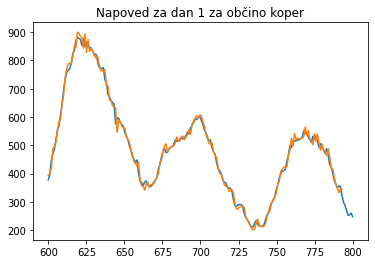

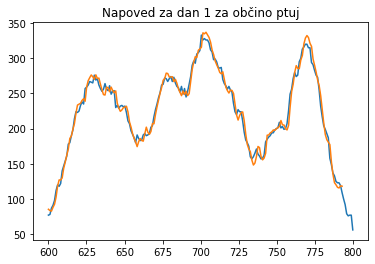

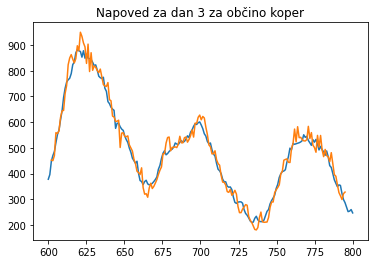

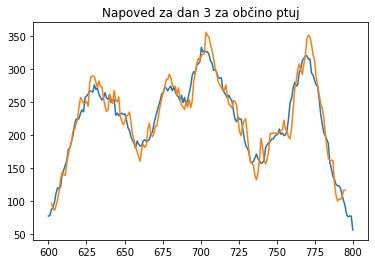

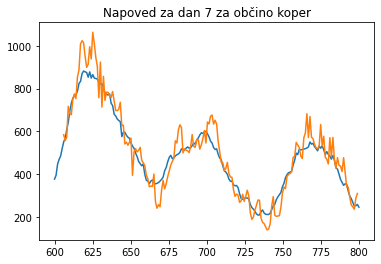

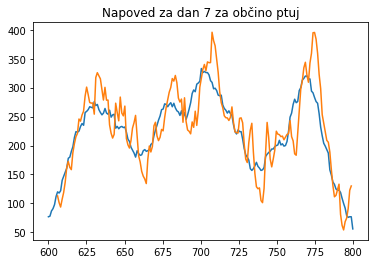

In [46]:
file_name = 'GRU_20_0.01_16_15_7_200_po_sekvencah.json'
for dan in [1, 3, 7]:
    prediction_graph(file_name, "koper", dan)
    prediction_graph(file_name, "ptuj", dan)

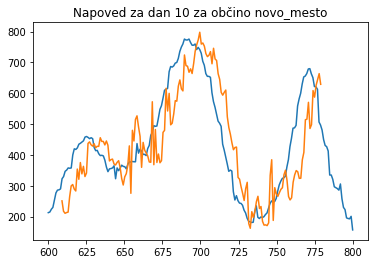

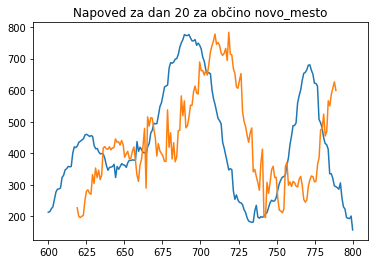

In [47]:
file_name = 'GRU_20_0.0001_16_15_30_200_po_sekvencah.json'
for dan in [10, 20]:
    prediction_graph(file_name, "novo_mesto", dan)

In [51]:
def calculate_r2_day_obcina(dan, data, obcina):
    r2_all_true = []
    r2_all_pred = []
    data2 = data["napovedi"]
    for i, predictions, loss in data2[obcina]:
        r2_all_true.append(y[obcina][i+dan])
        r2_all_pred.append(predictions[dan])
    r2_all = r2_score(r2_all_true, r2_all_pred)
    return r2_all

def calculate_r2_for_days(filename):
    directory_file = 'predictions/' + filename
    with open(directory_file) as json_file:
        data = json.load(json_file)
    sez = []
    for dan in range(7): 
        r2_all = 0
        for obcina in obcine:
            r2_all += calculate_r2_day_obcina(dan, data, obcina)
        r2_all = r2_all/len(obcine)
        sez.append(r2_all)
    return sez

# gremo čez zanko za M=7 in izpišimo top 5 model/hiperparametrov




In [52]:
accuracy_days = calculate_r2_for_days('GRU_20_0.01_16_15_7_200_po_sekvencah.json')
accuracy_days

[0.9886898750819674,
 0.972272322511015,
 0.950295705737008,
 0.9196545169246572,
 0.8814547277708122,
 0.8348662263838255,
 0.7806275090261289]

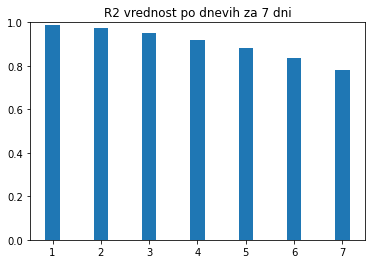

In [70]:
plt.title('R2 vrednost po dnevih za 7 dni')
plt.bar(torch.linspace(1,7,7),accuracy_days, width=0.3)
plt.ylim(0, 1)
plt.savefig('graphs\R2 vrednost po dnevih.jpg')
plt.show()

In [62]:
def calculate_r2_day_obcina(dan, data, obcina):
    r2_all_true = []
    r2_all_pred = []
    data2 = data["napovedi"]
    for i, predictions, loss in data2[obcina]:
        r2_all_true.append(y[obcina][i+dan])
        r2_all_pred.append(predictions[dan])
    r2_all = r2_score(r2_all_true, r2_all_pred)
    return r2_all

def calculate_r2_for_days(filename):
    directory_file = 'predictions/' + filename
    with open(directory_file) as json_file:
        data = json.load(json_file)
    sez = []
    for dan in range(30): 
        r2_all = 0
        for obcina in obcine:
            r2_all += calculate_r2_day_obcina(dan, data, obcina)
        r2_all = r2_all/len(obcine)
        sez.append(r2_all)
    return sez

# gremo čez zanko za M=7 in izpišimo top 5 model/hiperparametrov




In [63]:
accuracy_days30 = calculate_r2_for_days('GRU_20_0.0001_16_15_30_200_po_sekvencah.json')
accuracy_days30

[0.9898068534436272,
 0.9737402460580166,
 0.9514190160376169,
 0.9197924273782602,
 0.8797818216940746,
 0.8292702326766848,
 0.76822790320637,
 0.6836774392746672,
 0.577473937785605,
 0.4489315506544281,
 0.29635232834001357,
 0.12035055760826323,
 -0.07340255526702247,
 -0.2868215263321587,
 -0.49278805469325443,
 -0.7224009212897187,
 -0.9660651430022611,
 -1.2199102304221976,
 -1.494250302005134,
 -1.77381644661029,
 -2.071197213778041,
 -2.3797746737189316,
 -2.718434060271793,
 -3.076305087289755,
 -3.463336304968477,
 -3.878914519726443,
 -4.324018861134433,
 -4.809227432290099,
 -5.313186957648761,
 -5.85505496137104]

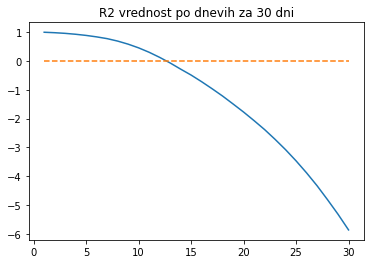

In [68]:
plt.title('R2 vrednost po dnevih za 30 dni')
plt.plot(torch.linspace(1,30,30),accuracy_days30)
plt.plot(torch.linspace(1,30,30), [0 for i in range(30)],linestyle='dashed')
plt.savefig('graphs\R2 vrednost po dnevih za 30 dni.jpg')
plt.show()